# Examples

This Jupyter notebook shows some examples for the different functions of the Python module `repet`.

Functions:
- [`original`](#original) - Compute the original REPET.
- [`extended`](#extended) - Compute REPET extended.
- [`adaptive`](#adaptive) - Compute the adaptive REPET.
- [`sim`](#sim) - Compute REPET-SIM.
- [`simonline`](#simonline) - Compute the online REPET-SIM.

Other:
- `wavread` - Read a WAVE file (using SciPy).
- `wavwrite` - Write a WAVE file (using SciPy).
- `specshow` - Display a spectrogram in dB, seconds, and Hz.


Author:
- Zafar Rafii
- zafarrafii@gmail.com
- http://zafarrafii.com
- https://github.com/zafarrafii
- https://www.linkedin.com/in/zafarrafii/
- 01/11/21

## <a id="original"></a>original

Compute the original REPET.

```
background_signal = repet.original(audio_signal, sampling_frequency)

Inputs:
    audio_signal: audio signal (number_samples, number_channels)
    sampling_frequency: sampling frequency in Hz
Output:
    background_signal: background signal (number_samples, number_channels)
```

### Example: Estimate the background and foreground signals, and display their spectrograms.

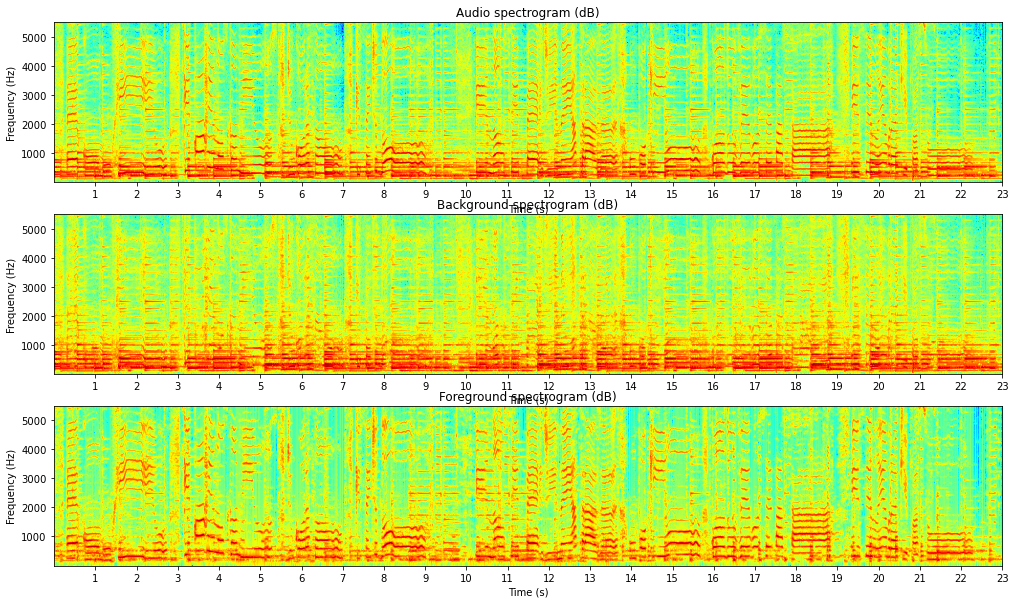

In [1]:
%matplotlib inline

# Import the modules
import numpy as np
import scipy.signal
import repet
import matplotlib.pyplot as plt

# Read the audio signal (normalized) with its sampling frequency in Hz
audio_signal, sampling_frequency = repet.wavread("audio_file.wav")

# Estimate the background signal, and the foreground signal
background_signal = repet.original(audio_signal, sampling_frequency)
foreground_signal = audio_signal-background_signal

# Write the background and foreground signals
# repet.wavwrite(background_signal, sampling_frequency, "background_signal.wav")
# repet.wavwrite(foreground_signal, sampling_frequency, "foreground_signal.wav")

# Compute the mixture, background, and foreground spectrograms
window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
window_function = scipy.signal.hamming(window_length, sym=False)
step_length = int(window_length/2)
number_frequencies = int(window_length/2)+1
audio_spectrogram = abs(repet._stft(np.mean(audio_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
background_spectrogram = abs(repet._stft(np.mean(background_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
foreground_spectrogram = abs(repet._stft(np.mean(foreground_signal, axis=1), window_function, step_length)[0:number_frequencies, :])

# Display the mixture, background, and foreground spectrograms in dB, seconds, and Hz
time_duration = len(audio_signal)/sampling_frequency
maximum_frequency = sampling_frequency/8
xtick_step = 1
ytick_step = 1000
plt.figure(figsize=(17, 10))
plt.subplot(3,1,1)
repet.specshow(audio_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Audio spectrogram (dB)")
plt.subplot(3,1,2)
repet.specshow(background_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Background spectrogram (dB)")
plt.subplot(3,1,3)
repet.specshow(foreground_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Foreground spectrogram (dB)")
plt.show()

## <a id="extended"></a>extended

Compute REPET extended.

```
background_signal = repet.extended(audio_signal, sampling_frequency)

Inputs:
    audio_signal: audio signal (number_samples, number_channels)
    sampling_frequency: sampling frequency in Hz
Output:
    background_signal: background signal (number_samples, number_channels)
```

### Example: Estimate the background and foreground signals, and display their spectrograms.

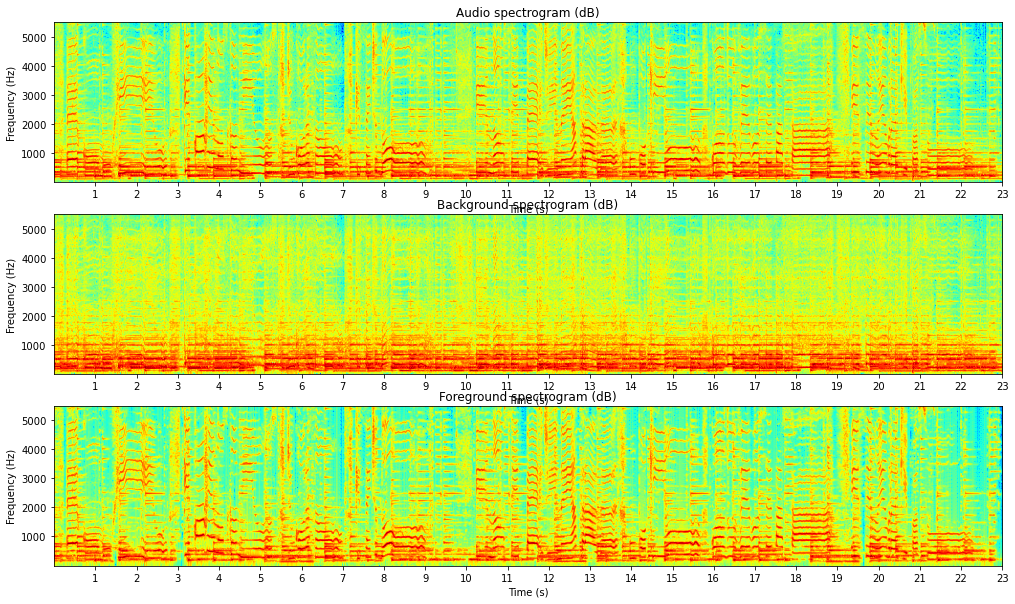

In [1]:
%matplotlib inline

# Import the modules
import numpy as np
import scipy.signal
import repet
import matplotlib.pyplot as plt

# Read the audio signal (normalized) with its sampling frequency in Hz
audio_signal, sampling_frequency = repet.wavread("audio_file.wav")

# Estimate the background signal, and the foreground signal
background_signal = repet.extended(audio_signal, sampling_frequency)
foreground_signal = audio_signal-background_signal

# Write the background and foreground signals
repet.wavwrite(background_signal, sampling_frequency, "background_signal.wav")
repet.wavwrite(foreground_signal, sampling_frequency, "foreground_signal.wav")

# Compute the mixture, background, and foreground spectrograms
window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
window_function = scipy.signal.hamming(window_length, sym=False)
step_length = int(window_length/2)
number_frequencies = int(window_length/2)+1
audio_spectrogram = abs(repet._stft(np.mean(audio_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
background_spectrogram = abs(repet._stft(np.mean(background_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
foreground_spectrogram = abs(repet._stft(np.mean(foreground_signal, axis=1), window_function, step_length)[0:number_frequencies, :])

# Display the mixture, background, and foreground spectrograms in dB, seconds, and Hz
time_duration = len(audio_signal)/sampling_frequency
maximum_frequency = sampling_frequency/8
xtick_step = 1
ytick_step = 1000
plt.figure(figsize=(17, 10))
plt.subplot(3,1,1)
repet.specshow(audio_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Audio spectrogram (dB)")
plt.subplot(3,1,2)
repet.specshow(background_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Background spectrogram (dB)")
plt.subplot(3,1,3)
repet.specshow(foreground_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Foreground spectrogram (dB)")
plt.show()

## <a id="adaptive"></a>adaptive

Compute the adaptive REPET.

```
background_signal = repet.adaptive(audio_signal, sampling_frequency)

Inputs:
    audio_signal: audio signal (number_samples, number_channels)
    sampling_frequency: sampling frequency in Hz
Output:
    background_signal: background signal (number_samples, number_channels)
```

### Example: Estimate the background and foreground signals, and display their spectrograms.

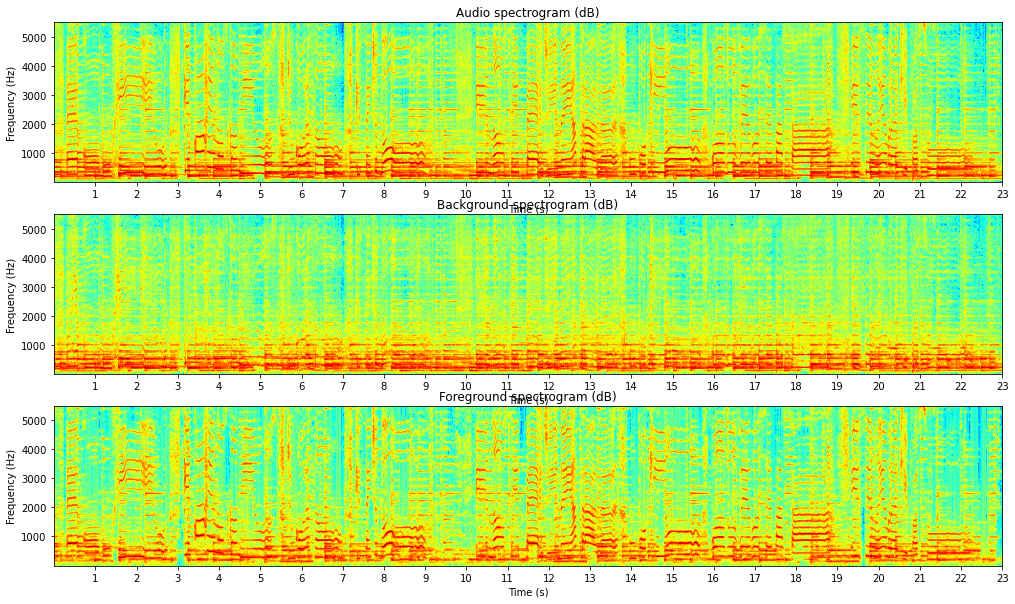

In [1]:
%matplotlib inline

# Import the modules
import numpy as np
import scipy.signal
import repet
import matplotlib.pyplot as plt

# Read the audio signal (normalized) with its sampling frequency in Hz
audio_signal, sampling_frequency = repet.wavread("audio_file.wav")

# Estimate the background signal, and the foreground signal
background_signal = repet.adaptive(audio_signal, sampling_frequency)
foreground_signal = audio_signal-background_signal

# Write the background and foreground signals
repet.wavwrite(background_signal, sampling_frequency, "background_signal.wav")
repet.wavwrite(foreground_signal, sampling_frequency, "foreground_signal.wav")

# Compute the mixture, background, and foreground spectrograms
window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
window_function = scipy.signal.hamming(window_length, sym=False)
step_length = int(window_length/2)
number_frequencies = int(window_length/2)+1
audio_spectrogram = abs(repet._stft(np.mean(audio_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
background_spectrogram = abs(repet._stft(np.mean(background_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
foreground_spectrogram = abs(repet._stft(np.mean(foreground_signal, axis=1), window_function, step_length)[0:number_frequencies, :])

# Display the mixture, background, and foreground spectrograms in dB, seconds, and Hz
time_duration = len(audio_signal)/sampling_frequency
maximum_frequency = sampling_frequency/8
xtick_step = 1
ytick_step = 1000
plt.figure(figsize=(17, 10))
plt.subplot(3,1,1)
repet.specshow(audio_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Audio spectrogram (dB)")
plt.subplot(3,1,2)
repet.specshow(background_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Background spectrogram (dB)")
plt.subplot(3,1,3)
repet.specshow(foreground_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Foreground spectrogram (dB)")
plt.show()

## <a id="sim"></a>sim

Compute REPET-SIM.

```
background_signal = repet.sim(audio_signal, sampling_frequency)

Inputs:
    audio_signal: audio signal (number_samples, number_channels)
    sampling_frequency: sampling frequency in Hz
Output:
    background_signal: background signal (number_samples, number_channels)
```

### Example: Estimate the background and foreground signals, and display their spectrograms.

In [ ]:
%matplotlib inline

# Import the modules
import numpy as np
import scipy.signal
import repet
import matplotlib.pyplot as plt

# Read the audio signal (normalized) with its sampling frequency in Hz
audio_signal, sampling_frequency = repet.wavread("audio_file.wav")

# Estimate the background signal, and the foreground signal
background_signal = repet.sim(audio_signal, sampling_frequency)
foreground_signal = audio_signal-background_signal

# Write the background and foreground signals
repet.wavwrite(background_signal, sampling_frequency, "background_signal.wav")
repet.wavwrite(foreground_signal, sampling_frequency, "foreground_signal.wav")

# Compute the mixture, background, and foreground spectrograms
window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
window_function = scipy.signal.hamming(window_length, sym=False)
step_length = int(window_length/2)
number_frequencies = int(window_length/2)+1
audio_spectrogram = abs(repet._stft(np.mean(audio_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
background_spectrogram = abs(repet._stft(np.mean(background_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
foreground_spectrogram = abs(repet._stft(np.mean(foreground_signal, axis=1), window_function, step_length)[0:number_frequencies, :])

# Display the mixture, background, and foreground spectrograms in dB, seconds, and Hz
time_duration = len(audio_signal)/sampling_frequency
maximum_frequency = sampling_frequency/8
xtick_step = 1
ytick_step = 1000
plt.figure(figsize=(17, 10))
plt.subplot(3,1,1)
repet.specshow(audio_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Audio spectrogram (dB)")
plt.subplot(3,1,2)
repet.specshow(background_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Background spectrogram (dB)")
plt.subplot(3,1,3)
repet.specshow(foreground_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Foreground spectrogram (dB)")
plt.show()

## <a id="simonline"></a>simonline

Compute the online REPET-SIM.

```
background_signal = repet.simonline(audio_signal, sampling_frequency)

Inputs:
    audio_signal: audio signal (number_samples, number_channels)
    sampling_frequency: sampling frequency in Hz
Output:
    background_signal: background signal (number_samples, number_channels)
```

### Example: Estimate the background and foreground signals, and display their spectrograms.

In [ ]:
%matplotlib inline

# Import the modules
import numpy as np
import scipy.signal
import repet
import matplotlib.pyplot as plt

# Read the audio signal (normalized) with its sampling frequency in Hz
audio_signal, sampling_frequency = repet.wavread("audio_file.wav")

# Estimate the background signal, and the foreground signal
background_signal = repet.simonline(audio_signal, sampling_frequency)
foreground_signal = audio_signal-background_signal

# Write the background and foreground signals
repet.wavwrite(background_signal, sampling_frequency, "background_signal.wav")
repet.wavwrite(foreground_signal, sampling_frequency, "foreground_signal.wav")

# Compute the mixture, background, and foreground spectrograms
window_length = pow(2, int(np.ceil(np.log2(0.04*sampling_frequency))))
window_function = scipy.signal.hamming(window_length, sym=False)
step_length = int(window_length/2)
number_frequencies = int(window_length/2)+1
audio_spectrogram = abs(repet._stft(np.mean(audio_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
background_spectrogram = abs(repet._stft(np.mean(background_signal, axis=1), window_function, step_length)[0:number_frequencies, :])
foreground_spectrogram = abs(repet._stft(np.mean(foreground_signal, axis=1), window_function, step_length)[0:number_frequencies, :])

# Display the mixture, background, and foreground spectrograms in dB, seconds, and Hz
time_duration = len(audio_signal)/sampling_frequency
maximum_frequency = sampling_frequency/8
xtick_step = 1
ytick_step = 1000
plt.figure(figsize=(17, 10))
plt.subplot(3,1,1)
repet.specshow(audio_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Audio spectrogram (dB)")
plt.subplot(3,1,2)
repet.specshow(background_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Background spectrogram (dB)")
plt.subplot(3,1,3)
repet.specshow(foreground_spectrogram[0:int(window_length/8), :], time_duration, maximum_frequency, xtick_step, ytick_step)
plt.title("Foreground spectrogram (dB)")
plt.show()